***Notes (Section 6 and 7)***

**Section 6: Time Series with Pandas**

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [4]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [7]:
my_date_time.hour

13

In [11]:
np.array(['2020-03-15', '2020-03-16','2020-03-17'], dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [13]:
np.arange('2018-06-01','2018-06-23',7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [14]:
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [15]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.to_datetime(['2/1/2018','3/1/2018'],format='%d/%m/%Y')

ValueError: time data "Jan 3, 2018" doesn't match format "%d/%m/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [23]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-0.52110972  1.02142327]
 [-0.48328972 -1.73067944]
 [-0.7550737  -0.83310002]]


In [24]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')

df= pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-01-01,-0.521110,1.021423
2020-01-02,-0.483290,-1.730679
2020-01-03,-0.755074,-0.833100


In [30]:
df = pd.read_csv('C:\\Users\\Simon\\Documents_local\\GitHub2\\UdemyTimeSeries\\Udemy_TimeSeries_res\\Data\\starbucks.csv', index_col='Date',parse_dates=True)

In [31]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [32]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [33]:
# daily ---> yearly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [34]:
def first_day(entry):
    # IS THERE AN ENTRY ? 
    if len(entry):
        return entry[0]

In [35]:
df.resample(rule='A').apply(first_day)

C:\Users\Simon\AppData\Local\Temp\ipykernel_14160\774127974.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


<Axes: xlabel='Date'>

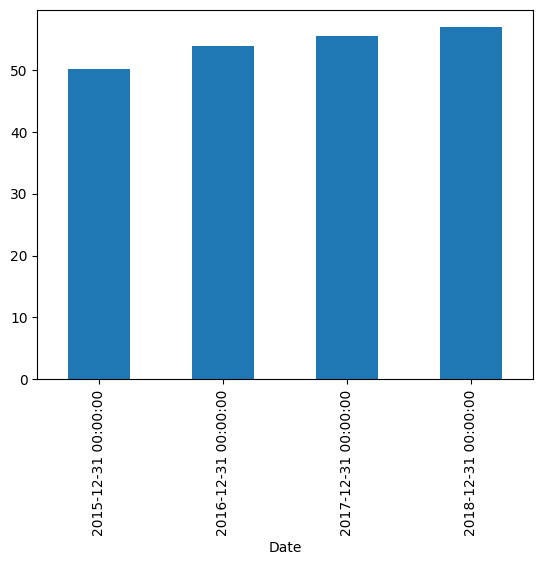

In [37]:
df['Close'].resample('A').mean().plot.bar()

In [38]:
# time shifting

In [39]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [40]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [41]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [42]:
# rolling and expanding

In [43]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

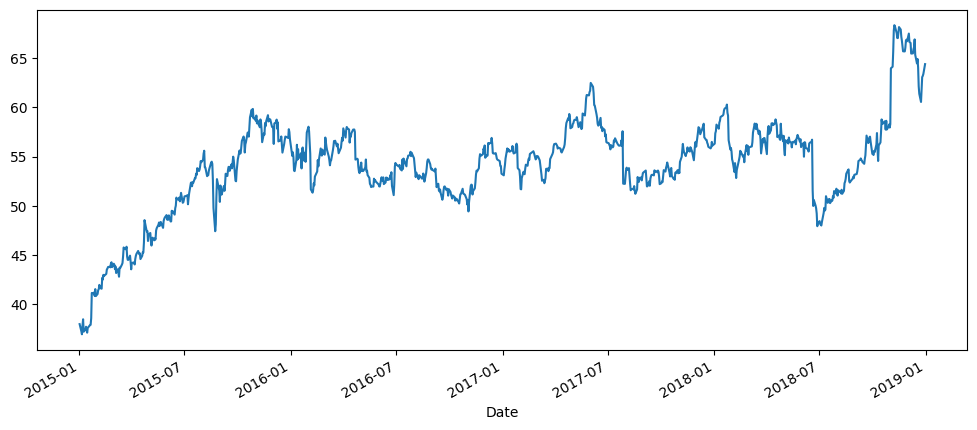

In [45]:
df['Close'].plot(figsize=(12,5))

In [46]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<Axes: xlabel='Date'>

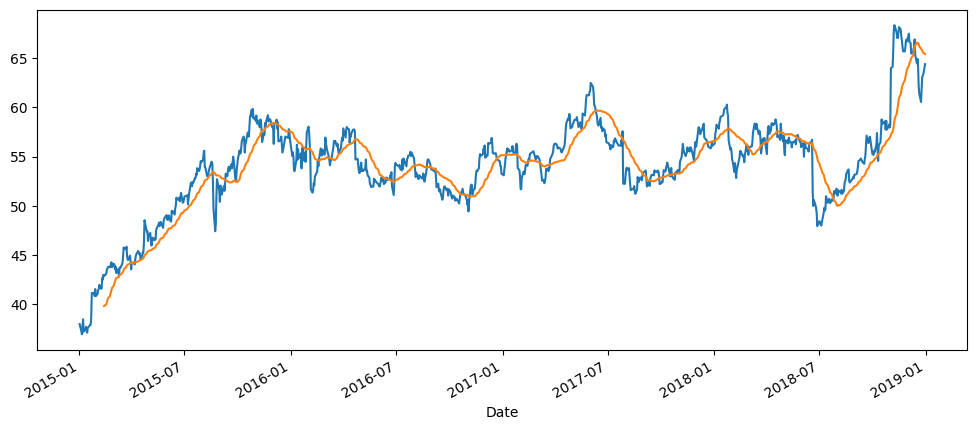

In [47]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

In [48]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<Axes: xlabel='Date'>

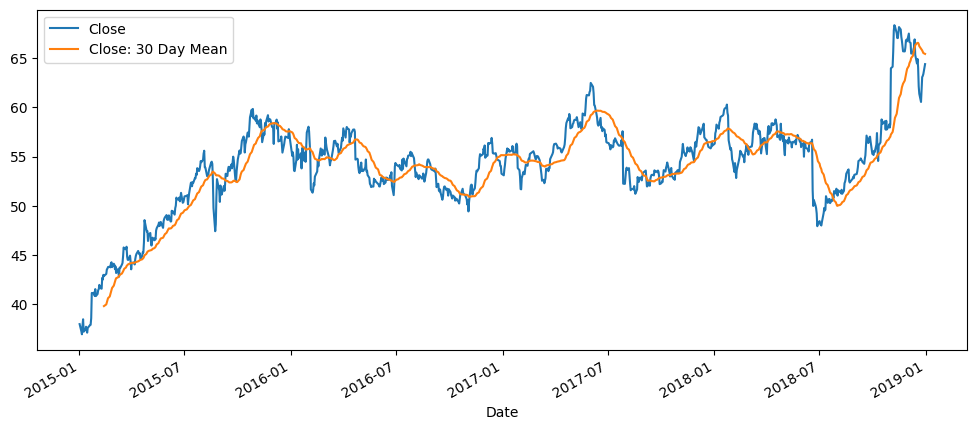

In [49]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

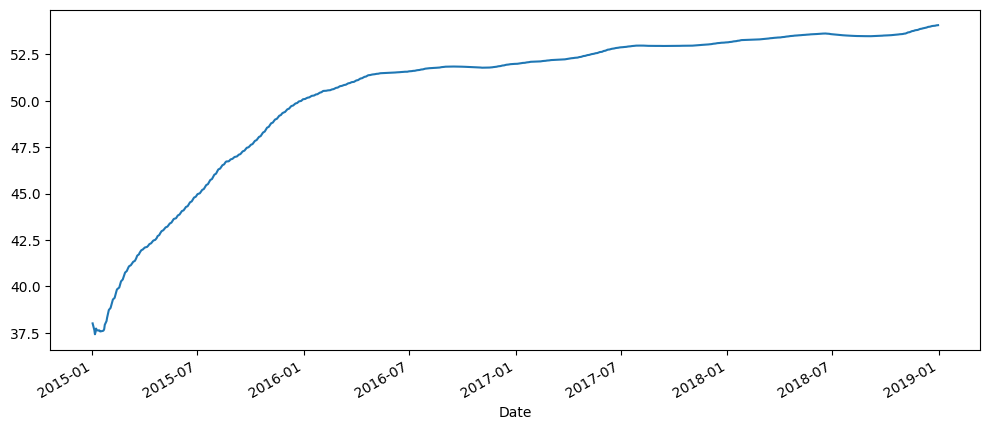

In [51]:
df['Close'].expanding().mean().plot(figsize=(12,5))

In [52]:
# Visualizing time series data

df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

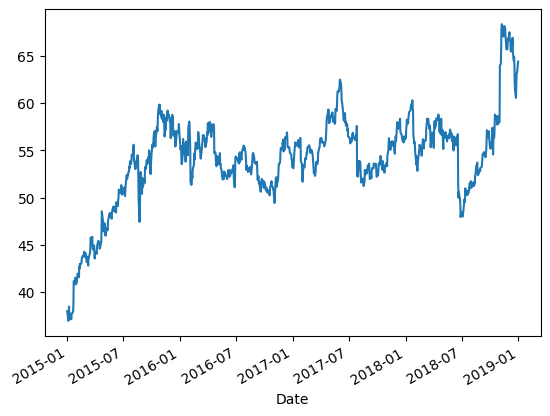

In [55]:
df['Close'].plot();

In [56]:
title = 'TITLE'
ylabel= 'Y LABEL'
xlabel = 'XLABEL'

[Text(0.5, 0, 'X LABEL'), Text(0, 0.5, 'Y LABEL')]

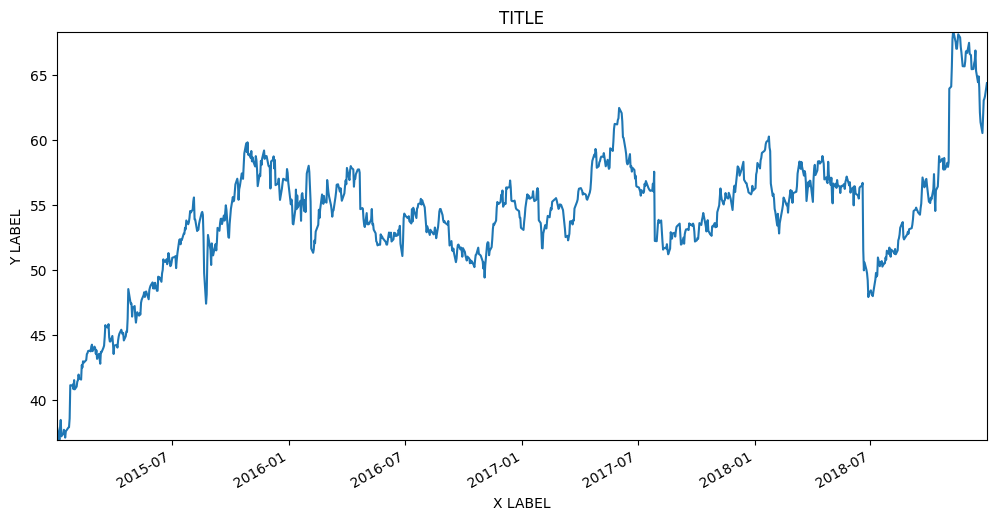

In [59]:
ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

<Axes: xlabel='Date'>

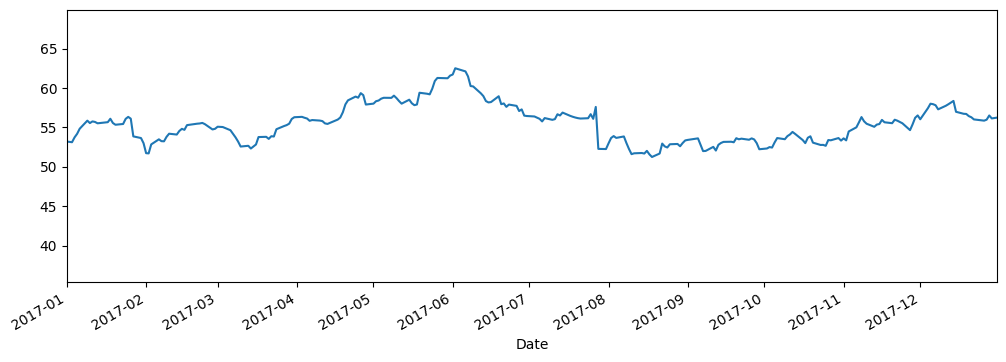

In [64]:
# df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))
df['Close'].plot(figsize=(12,4),xlim=('2017-01-01','2017-12-31'))
